# Chapter 2 _ keras

https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class05_class_reg.ipynb
    
https://www.youtube.com/watch?v=9abzk34U56c&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=20&frags=wn

# Binary Classification, Classification and Regression

Binary Classification - Classification between two possibilities (positive and negative). Common in medical testing, does the person have the disease (positive) or not (negative).

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [1]:
from farhad_DL.utility import plot_roc,plot_confusion_matrix 

In [ ]:
from farhad_DL.utility import encode_numeric_range

# Binary Classification

Binary classification is used to create a model that classifies between only two classes.

## datset that is used 

<b>wcbreast_wdbc dataset</b><br>
This is a popular dataset that contains columns that might be useful to determine if a tumor is breast cancer or not. There are a total of 32 columns and 569 rows. <br>
Dataset provided by [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

In [1]:
import os
import pandas as pd
import numpy as np

path = "t81_558_deep_learning/data/"
    
filename = os.path.join(path,"wcbreast_wdbc.csv")
df = pd.read_csv(filename,na_values=['NA','?'])

# Shuffle
np.random.seed(42)
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)

df.head()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,87930,B,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
1,859575,M,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
2,8670,M,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
3,907915,B,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
4,921385,B,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134


## Model

In [2]:
import os 
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.logging import set_verbosity, ERROR

from farhad_DL.utility import to_xy, encode_text_index
from farhad_DL.utils import plot_training_summary,TimeSummary

Using TensorFlow backend.


In [14]:
# Set the desired TensorFlow output level for this example
set_verbosity(ERROR)


# read file    
filename = os.path.join(path,"wcbreast_wdbc.csv")    
df = pd.read_csv(filename,na_values=['NA','?'])

# Encode feature vector
df.drop('id',axis=1,inplace=True)
diagnosis = encode_text_index(df,'diagnosis')
num_classes = len(diagnosis)

# Create x & y for training

# Create the x-side (feature vectors) of the training
x, y = to_xy(df,'diagnosis')
    
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42) 

# Build network
def biasy_model():
    model = Sequential()
    
    model.add(Dense(units=20,input_dim=x.shape[1],activation="relu"))
    model.add(Dense(10,activation="relu"))
    model.add(Dense(y.shape[1],activation="softmax"))
    
    return model

model = biasy_model()
model.compile(loss='categorical_crossentropy', 
              optimizer='adam'
             )
# describe callback:
#first
time_summary = TimeSummary()

#secound
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

#Third _ save best model
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) 

summary= model.fit(x_train,y_train,
                   validation_data=(x_test,y_test),
                   callbacks=[monitor,checkpointer,time_summary],
                   verbose=0,
                   batch_size=100,
                   epochs=1000)

# load weights from best model
model.load_weights('best_weights.hdf5') 

# Measure accuracy
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_compare = np.argmax(y_test,axis=1)
score = accuracy_score(y_compare, pred)
print("Final accuracy: {}".format(score))

Epoch 00047: early stopping
Final accuracy: 0.9230769230769231


Training time: 0:00:01.778408(HH:MM:SS)
Epoch time avg: 0:00:00.037814(HH:MM:SS)


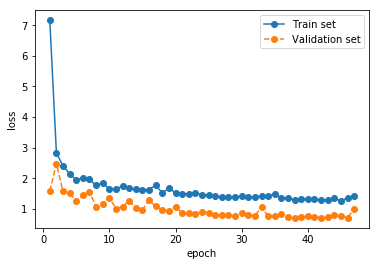

In [15]:
plot_training_summary(summary, time_summary)

# Confusion Matrix

In [5]:
import numpy as np
import  matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

from farhad_DL.utility import plot_confusion_matrix

In [16]:
# Compute confusion matrix
cm = confusion_matrix(y_compare,pred)
np.set_printoptions(precision=2)

In [17]:
print('Confusion matrix, without normalization')
print(cm)

Confusion matrix, without normalization
[[84  5]
 [ 6 48]]


<Figure size 432x288 with 0 Axes>

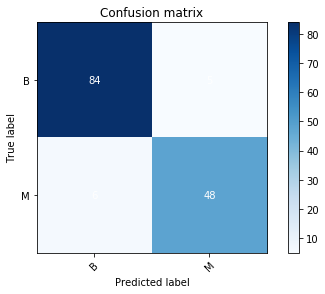

In [18]:
plt.figure()
plot_confusion_matrix(cm, diagnosis)
plt.show()

In [19]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)

Normalized confusion matrix
[[0.94 0.06]
 [0.11 0.89]]


<Figure size 432x288 with 0 Axes>

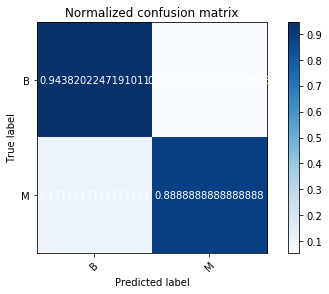

In [20]:
plt.figure()
plot_confusion_matrix(cm_normalized, diagnosis, title='Normalized confusion matrix')
plt.show()

In [11]:
y_compare

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [12]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
diagnosis

array(['B', 'M'], dtype=object)

## ROC Curves

In [23]:
from farhad_DL.utility import plot_roc

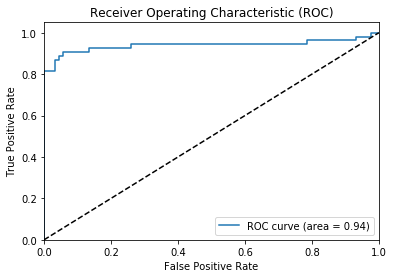

In [24]:
pred = model.predict(x_test)
pred = pred[:,1] # Only positive cases
plot_roc(pred,y_compare)

## Classification

calssification with three class

# data

In [4]:
# load iris dataset
from seaborn import load_dataset
df_iris = load_dataset('iris')
df_iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
111,6.4,2.7,5.3,1.9,virginica
67,5.8,2.7,4.1,1.0,versicolor
61,5.9,3.0,4.2,1.5,versicolor


# model

In [3]:
import pandas as pd 
import numpy as np 

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from seaborn import load_dataset

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.logging import set_verbosity, ERROR
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from farhad_DL.utils import TimeSummary, plot_training_summary
from farhad_DL.utility import to_xy, encode_text_index, plot_confusion_matrix

In [5]:
# describtion model funcation
def classsfication_model(x_shape,y_shape):
    model = Sequential()
    model.add(Dense(20,input_dim=x_shape[1],activation="relu"))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(y_shape[1], activation='softmax'))
    
    return model

In [15]:
# dont show me error
set_verbosity(ERROR)

# Load data
df_iris = load_dataset('iris')

#ready data
species = encode_text_index(df_iris, 'species')
x,y = to_xy(df_iris,'species')
x_trian, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)
# load model
model = classsfication_model(x.shape,y.shape)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# describe callbakcs
time_summary = TimeSummary()
monitor = EarlyStopping(monitor='val_pass',min_delta=1e-3, patience=5, verbose=0, mode='atuo' )
checkpoint = ModelCheckpoint(filepath='best_weights.hdf5',verbose=0,save_best_only=True)

# feed model
summary = model.fit(x_trian,y_train, 
                    validation_data=(x_test,y_test),
                    verbose=0,
                    callbacks=[time_summary,monitor,checkpoint],
                    batch_size=50,
                    epochs=100)
model.load_weights('best_weights.hdf5') 
#accuracy
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_compare = np.argmax(y_test,axis=1)
score = accuracy_score(y_compare, pred)
print("Final accuracy: {}".format(score))

Final accuracy: 0.9736842105263158


Training time: 0:00:03.363947(HH:MM:SS)
Epoch time avg: 0:00:00.012952(HH:MM:SS)


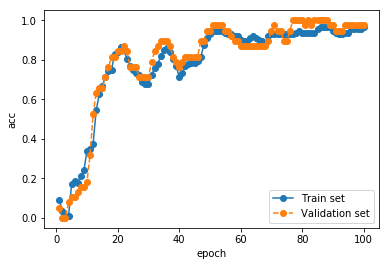

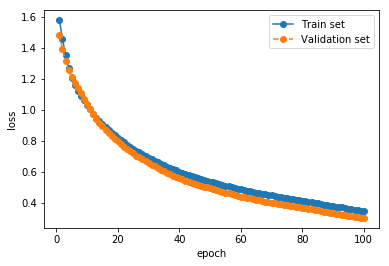

In [16]:
plot_training_summary(summary,time_summary)

Confusion matrix, without normalization
[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


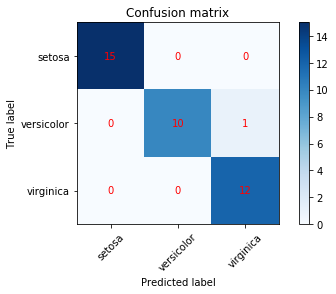

In [17]:
cm = confusion_matrix(y_compare,pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)

plot_confusion_matrix(cm, species)

Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.91 0.09]
 [0.   0.   1.  ]]


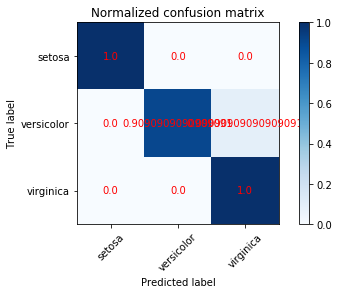

In [19]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plot_confusion_matrix(cm_normalized, species, title='Normalized confusion matrix')


# Regression

## data

https://archive.ics.uci.edu/ml/datasets/auto+mpg
    
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

In [22]:
import pandas as pd
path = 't81_558_deep_learning/data/auto-mpg.csv'
df_mpg = pd.read_csv(path)
df_mpg.sample(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
318,29.8,4,134.0,90,2711,15.5,80,3,toyota corona liftback
114,26.0,4,98.0,90,2265,15.5,73,2,fiat 124 sport coupe
257,19.4,6,232.0,90,3210,17.2,78,1,amc concord


## Model

In [3]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.logging import set_verbosity, ERROR
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


from farhad_DL.utils import TimeSummary, plot_training_summary
from farhad_DL.utility import encode_numeric_zscore # normalization
from farhad_DL.utility import chart_regression
from farhad_DL.utility import encode_text_dummy, missing_median, to_xy

In [40]:
# make model
def regression():
    model = Sequential()
    model.add(Dense(20, input_dim=x.shape[1], activation="relu"))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(1)) # don't used softmax,  destoried everything, becuse keep result between 0 to 1
    return model 

In [48]:
preprocess = False

# Load data:
df_mpg = pd.read_csv('t81_558_deep_learning/data/auto-mpg.csv',na_values=['NA','?'])

# ready data
missing_median(df_mpg, 'horsepower')
encode_text_dummy(df_mpg,'origin')
df_mpg.drop('name', axis=1, inplace=True)

if preprocess:
    encode_numeric_zscore(df, 'horsepower')
    encode_numeric_zscore(df, 'weight')
    encode_numeric_zscore(df, 'cylinders')
    encode_numeric_zscore(df, 'displacement')
    encode_numeric_zscore(df, 'acceleration')
    

# Encode to a 2D matrix for training
x, y = to_xy(df_mpg,'mpg')

# Split into train/test
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size=0.25, random_state=42)

# Load model
model = regression()
model.compile(optimizer='Adam', loss="mean_squared_error", metrics=['accuracy'])

# describation callbacks
time_summary = TimeSummary()
monitor = EarlyStopping(monitor='val_process', min_delta=1e-3, verbose=0, patience=5, mode='atuo')
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True)

#Feed Model
summary = model.fit(x_train,y_train, 
                    validation_data=(x_test,y_test),
                    callbacks=[time_summary,monitor, checkpointer], 
                    verbose=0, 
                    batch_size=20, 
                    epochs=1000)

# load weights from best model
model.load_weights("best_weights.hdf5")

# Predict and measure RMSE
pred = model.predict(x_test)
score = np.sqrt(mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

Score (RMSE): 2.370800018310547


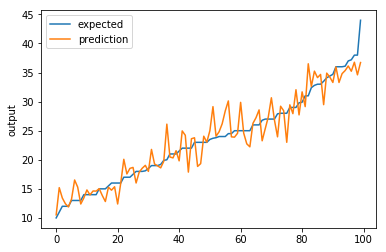

In [50]:
# Plot the chart
chart_regression(pred.flatten(),y_test)

To generate a lift chart, perform the following activities:
- Sort the data by expected output. Plot the blue line above.
- For every point on the x-axis plot the predicted value for that same data point. This is the green line above.
- The x-axis is just 0 to 100% of the dataset. The expected always starts low and ends high.
- The y-axis is ranged according to the values predicted.

Reading a lift chart:
- The expected and predict lines should be close. Notice where one is above the ot other.
- The above chart is the most accurate on lower M

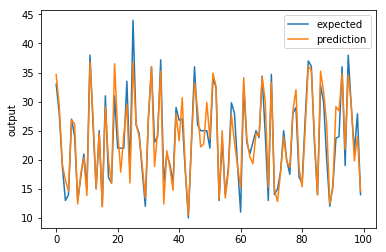

In [52]:
# Plot the chart
chart_regression(pred.flatten(),y_test,sort=False)

Training time: 0:02:51.075650(HH:MM:SS)
Epoch time avg: 0:00:00.168232(HH:MM:SS)


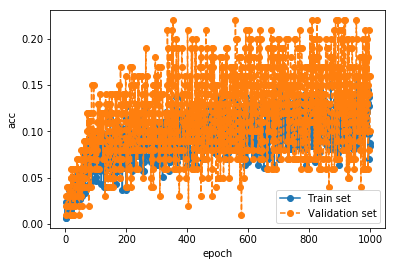

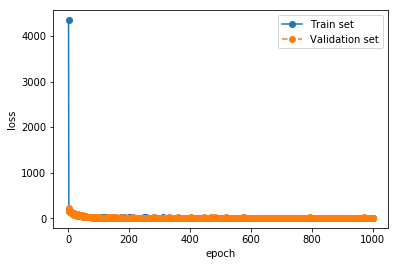

In [53]:
plot_training_summary(summary,time_summary)

In [ ]:
from sklearn impor

#  +excersies  
## #5 Sample Code

https://github.com/jeffheaton/t81_558_deep_learning/blob/master/assignments/assignment_yourname_class5.ipynb

## data

In [ ]:
import padas as pd 
import os
path= "t81_558_deep_learning/data"
filename_read = os.path.join(path,"reg-33-spring-2019.csv")
df_r3s = pd.read_csv(filename_read) #na_values=['NA','?']

## model

<font size="8"><b>+ PLus theory

# confusion matrixes

In [ ]:
from sklearn.metrics import confusion_matrix
from farhad_DL.utility import plot_confusion_matrix

In [ ]:
cm = confusion_matrix(label,predact_label)
plot_confusion_matrix(cm,['true','false'],title)

Binary classification is common in medical testing. Often you want to diagnose if someone has a disease. This can lead to two types of errors, know as false positives and false negatives:
- False Positive - Your test (neural network) indicated that the patient had the disease; however, the patient did not have the disease.
- False Negative - Your test (neural network) indicated that the patient did not have the disease; however, the patient did have the disease.
- True Positive - Your test (neural network) correctly identified that the patient had the disease.
- True Negative - Your test (neural network) correctly identified that the patient did not have the disease.

<img src="Screenshot 2018-11-15 at 22.35.20.png">

# Roc Curve

An ROC curve measures how good a model is regardless of the cutoff.

<img src="https://camo.githubusercontent.com/a9b8e1f61b0e87e4c186d226339bdcecca58cf95/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6a656666686561746f6e2f7438315f3535385f646565705f6c6561726e696e672f6d61737465722f696d616765732f636c6173735f345f726f632e706e67">

<b>near prefect predicative power is best place, but when it happened, it is usually overfit

Types of errors:<br>
<img src="https://camo.githubusercontent.com/00ff326866d44ac892d0c76eec0f81f9d0fb4272/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6a656666686561746f6e2f7438315f3535385f646565705f6c6561726e696e672f6d61737465722f696d616765732f636c6173735f345f6572726f72732e706e67">  <br>
Neural networks classify in terms of probability of it being positive. However, at what probability do you give a positive result? Is the cutoff 50%? 90%? Where you set this cutoff is called the threshold. Anything above the cutoff is positive, anything below is negative. Setting this cutoff allows the model to be more sensitive or specific:<br>
<img src="https://camo.githubusercontent.com/d015d269ac45b93308ba852ab29939e6c4e6a37a/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6a656666686561746f6e2f7438315f3535385f646565705f6c6561726e696e672f6d61737465722f696d616765732f636c6173735f345f7431767374322e706e67">

# set_verbosity(ERROR)

# categorical_crossentropy

We often see categorical_crossentropy used in multiclass classification tasks.<br>
<img class="w3-card-4 w3-left" src="https://cloud.githubusercontent.com/assets/18217467/25556005/1bb51402-2d12-11e7-87ef-a9bad097a858.png">

# relu

<img class="w3-card-4 w3-left" src="https://wikimedia.org/api/rest_v1/media/math/render/svg/aaabce8985d074b5f4482f4efa327c7c61da3ca6">

# softmax

<img class="w3-card-4 w3-left" src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5dc2e7b03ea31dd2ad75d939dc93eb0bfc1fa050">

# adam

# Callback

https://keras.io/callbacks/

A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training

### EarlyStopping()

In [ ]:
keras.callbacks.EarlyStopping(monitor='val_loss', 
                              min_delta=0, 
                              patience=0, 
                              verbose=0, 
                              mode='auto', 
                              baseline=None, 
                              restore_best_weights=False)

Stop training when a monitored quantity has stopped improving.
- patience: number of epochs with no improvement after which training will be stopped. 
- mode: one of {auto, min, max}. In min mode, training will stop when the quantity monitored has stopped decreasing; in max mode it will stop when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity.

### ModelCheckpoint()

In [ ]:
keras.callbacks.ModelCheckpoint(filepath, 
                                monitor='val_loss', 
                                verbose=0, 
                                save_best_only=False, 
                                save_weights_only=False, 
                                mode='auto', period=1)

Save the model after every epoch.